# Floating point operations, Round-Off Error, Arithmetic


## Floating Point Representations: How does a Computer Represent Numbers? 

Computers do not store most numbers exactly, such as $\pi$ or $\sqrt 2$, but rather as floating point binary numbers, which introduces roundoff or truncation error. First let's look at how a computer actually represents floating point numbers. Computers store numbers in binary, meaning for a decimal x, the number will be represented as:

$$(a_n \times 2^n) + (a_{n-1} \times 2^{n-1}) + \dots (a_1 \times 2) + a_0$$

Where each $a_i$ is either $0$ or $1$. Consider the problem of algorithmically converting a decimal number to binary. A potential algorithm to accomplish this may be:

$$x = 2c_0 + a_0$$
$$c_0 = 2c_1 + a_1$$
$$c_1 = 2c_2 + a_2$$
$$\vdots$$
$$c_{n-1} = 2(0) + a_n$$

where each $a_i \in \{0,1\}$. Then, $x$ can be represented as $(a_n a_{n-1} ... a_1 a_0)_2$ A more effective way to write this algorithm would be as below. 

$$\text{DecimalToBinary}(x):$$
$$
\begin{aligned}
& \hspace{20px} x = 2c_0 + a_0 \\
&\hspace{20px} \textbf{for } i = 1, \dots, n: \\
&\hspace{20px} \quad c_{i-1} = 2c_i + a_i \\
&\hspace{20px} \quad \textbf{if } c_i = 0 \textbf{ then stop} \\
& \hspace{20px} \textbf{return} \hspace{5px} (a_n a_{n-1} ... a_1 a_0)
\end{aligned}
$$


While computers use binary, we can create this kind of representation for any base $\beta$ (so a binary number is where $\beta = 0$). For example, the base-$3$ number $(210.12)_3$ would be the following in decimal: 

$$x = (2 \times 3^2) + (1 \times 3^1) + (0 \times 3^0) + (1 \times 3^{-1}) + (2 \times 3^{-2}) = (21.555)_{10}$$


To be more specific, computers represent numbers in the following general form (the exact standard is not relevant to the study of numerical processes, but an example would be the IEEE representation), where $\sigma$ represents the sign. 

$$x = \sigma ( . a_1 a_2 \dots a_f a_{f+1})_\beta \hspace{2px} \beta^f$$


Consider $x = 0.1342567823 \times 10^7$. This number has 10 digits after the decimal, but suppose our specific computer architecture only can handle up to 9 digits in a representation. Computer architectures generally handle this issue via two methods: either by truncating the extra digits or by rounding it. So in this case, our approximate representation would be $x = 0.134256782 \times 10^7$. This introduces a slight mismatch between the true value of what we want to represent, and the approximated value that is limited by the computer's hardware. A major part of Numerical Analysis is studying how these errors are formed, propogate, and scale, as well as how they can be handled. 

## Absolute and Relative Errors

Let $x_A = x_T + \epsilon$ be our approximated value and let $x_T$ be our true value. The following are two different definitions of error associated with a given approximation. The absolute error definiton is intuitive and simple, but fails to capture the scale of the variables. For example, the absolute error in the measurement of a countries GDP may be on the order of 1-million, but this error is far more insigificant than the absolute error would suggest. Thus, the relative error is a popular choice for many applications. 


$$ E_{abs}(x_A) = |x_T - x_A| $$


$$ E_{rel}(x_A) = \frac{|x_T - x_A|}{|x_T|} $$

Let us analyze what these errors look like for products, and how they scale. 

1. Absolute Representation

$$E_{abs} = x_Ty_T - x_Ay_A = (x_A + \epsilon)(y_A + \delta) - x_A y_A$$
$$ = x_Ay_A + x_A \epsilon + y_A \delta + \epsilon \delta - x_A y_A = x_A \epsilon + y_A \delta$$
$$E_{abs}(x_Ay_A) = O(|x_A| \epsilon + |y_A| \delta)$$


2. Relative Representation 

$$ E_{rel}(x_A y_A) = \frac{|(x_Ty_T) - (x_Ay_T)|}{|x_T y_T|}$$
$$ E_{rel}(x_A y_A) = \frac{|(x_Ty_T) - (x_T - \epsilon)(y_T - \delta)|}{|x_T y_T|} = \frac{x_T y_T - (x_T y_T - \epsilon x_T - \delta y_T + \epsilon \delta)}{|x_T y_T|}$$
$$= \frac{|\epsilon x_T + \delta y_T + \epsilon \delta|}{|x_T y_T|} = \frac{\epsilon}{x_T} + \frac{\delta}{y_T} - \frac{\epsilon \delta}{x_T y_T}$$
$$ = E_{rel}(x_A y_A) \leq |E_{rel}{x_A}| + |E_{rel}(y_A)|$$

Since the relative error is additive, it is a more efffective measure of accuracy as absolute error scales with magnitudes of $x_A$ and $y_A$, while relative error ignores scale and gives us a clean, additive bound. 


Now let us look at the errors for division. Given $x_T, x_A, y_T, y_A$, let's compute the errors for $\frac{x_T}{y_T}$. 

$$E_{rel}(\frac{x_T}{y_T}) = \frac{|\frac{x_T}{y_T} - \frac{x_A}{y_A}|}{|\frac{x_T}{y_T}|} \leq \frac{E_{rel}(x_A) + E_{rel}(y_A)}{1 - E_{rel}(y_A)}$$

If $E_{rel}(x_A), E_{rel}(y_A) << 1,$, $\implies$ $E_{rel}(x_A / y_A) << 1$. However, $E_{abs}(x_A / y_A)$ has problems if $y_A$ is small. 

Now, let us look at subtraction/addition. 

$$E_{abs}(x_A \pm y_A) = |(x_T \pm y_T) - (x_A \pm y_A)| = |\epsilon + \delta|$$
$$E_{rel}(x_A \pm y_A) = \frac{|(x_T \pm y_T) - (x_A \pm y_A)|}{|x_T \pm y_T|} = \frac{|\epsilon + \delta|}{|x_T \pm y_T|}$$

This suggests that there may be a problem if $x_T \pm y_T$ is small. For example, consider an 8-bit machine with $x_T = (0.73484311) \times 10^1$, and $y_T = (0.73481300) \times 10^1$. Suppose we want to compute $x_T - y_T \approx x_A - y_A$. The value of the computation should be $(0.00003011) \times 10^1$. The machine should compute this as $(0.30110000) \times 10^{-3}$ because the floating point representation does not have leading zeroes in the representation. However, rather than the four trailing zeroes in the difference, those four zeroes are instead filled with random existing numbers in memory as the computer will not clear those memory locations. **The last four digits are lost in the subtraction and made arbitrary.**

$$E_{rel}(x_A - y_A) \approx 10^{-8} / 10^{-3} = 10^{-5}$$

## Polynomials: How many operations are needed under different representations? 

Consider the polynomail $p_3(x) = 4x^3 + 0.2x^2 - 2.1x + 5$ In order to evaluate this polynomial at a specific point, we have to perform three addition operations and six multiplication operations, so nine total floating point operations. Now suppose the polynomial is written equivalently as $((4x + 0.2)x - 2.1)x + 5$. We now have to perform three additions and three multiplications, for a total of six floating point operations. The nested formulation of the polynomial clearly takes less operations to evaluate at a specific point, which $p_n(x)$ with larger $n$, can be very significant.


$$p_n(x) = a_n x^{n} + a_{n-1} x^{n-1} + \dots a_1x + a_0 = ((a_n x + a_{n-1})x + \dots + a_1)x + a_0$$


In the first representation, we have to perform $n + (n-1) + \dots + 1$ multiplications which is $n(n+1)/2$, on the order of $O(n^2)$. On the second representation, we only need to perform $n$ multiplications, so the operation is $O(n)$.

## Polynomial Interpolation 

A very simple example would be finding a line that goes through two given points, such as $(x_0, y_0) = (1,1)$ and $(x_1, y_1) = (3,2)$. We can find our polynomial $p_1(x) = 0.5x + 0.5$. 

$$= \frac{x - 3}{1 - 3} \times 1 + \frac{x - 1}{3 - 1} \times 2 = \frac{x - x_1}{x_0 - x_1} \times y_0 + \frac{x - x_0}{x_1 - x_0} \times y_1$$

Given three points, $(x_0, y_0) = (0,1)$, $(x_1, y_1) = (-1,2)$ and $(x_2, y_2) = (1,3)$, we can find the polynomial $p_2(x) = 1.5x^2 + 0.5x + 1$. We can produce this polynomial through the following formula / algorithm. 

$$p_2(x) = \frac{(x - x_1)(x - x_2)}{(x_0 - x_1)(x_0 - x_2)} y_0 + \frac{(x - x_2)(x - x_0)}{(x_1 - x_2)(x_1 - x_0)} y_1 + \frac{(x - x_0)(x - x_1)}{(x_2 - x_0)(x_2 - x_1)} y_2$$

In general, given (n+1) district points $(x_0, f(x_0))$, $(x_1, f(x_2))$ \dots $(x_n, f(x_n))$ where $f$ is the underlying function we are trying to interpolate, we can define

$$l_k(x) = \prod_{i=0, \hspace{3px} i \not= k}^n \frac{(x - x_i)}{x_k - x_i} = \frac{(x - x_0) \dots (x - x_{k+1}) \dots (x - x_n)}{(x_k - x_0) \dots (x_k - x_{k + 1}) \dots}$$
$$p_n(x) = \sum_{k=0}^n l_k(x) \times f(x_k)$$

$p_n(x)$ interpolates the $n+1$ points. Note that we need $n+1$ points to interpolate a polynomial of degree $n$. 

Proof:

1. $l_k(x)$ is a polynomial of degree n
2. $l_k(x_k) = 1$, $l_k(x_i) = 0$ if $i \not= k$

$$p_n(x_i) = \sum_{k=0}^n l_k(x_i) f(x_k) = f(x_i), \hspace{3px} i = 0, 1, \dots ,n$$

**Thm: Polynomial Interpolation Theorem** 

Given a real valued function $f(x)$ and $n+1$ distinct points, $x_0, \dots x_n$, $\exists$ ! polynomial of degree $\leq n$ which interpolates $f(x)$ at $x_0, \dots x_n$. 

Excercises: 
1. Write an algorithm to evaluate the L-form 
2. What is the cost for the algorithm? (how many floating point operations)

Note that computing the $L$-form is more expensive, even than a standard polynomial evaluation. It is also inconvenient to add points. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def evaluateLForm(data, x):
    n = len(data)
    total = 0
    for k in range(n):
        x_k, y_k = data[k]
        l = 1
        for i in range(n):
            if i != k:
                x_i, _ = data[i]
                l *= (x - x_i) / (x_k - x_i)
        total += l * y_k
    return total 

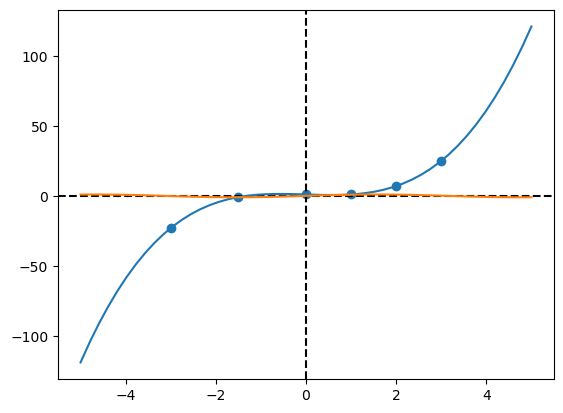

In [3]:
data = np.array([
    [-3, -23],
    [-1.5, -0.875],
    [0, 1],
    [1, 1],
    [2, 7],
    [3, 25]
])

x_coords = [x_val for x_val, _ in data]
y_coords = [y_val for _, y_val in data]
x = np.linspace(-5, 5, 50)
y = evaluateLForm(data, x)
plt.axhline(y=0, color='black', linestyle='--')
plt.axvline(x=0, color='black', linestyle='--')
plt.plot(x,y)

plt.scatter(x_coords, y_coords)
plt.plot(x, np.sin(x))

### Newton's Interpolation

Can we write the interpolation polynomial in a nested fashion, and make it easier to handle if we add a new point / additional information? Suppose we write our interpolation polynomial in the form 

$$p_k(x) = A_0 + A_1(x - x_0) + A_2(x - x_0)(x - x_1) + \dots + A_k(x - x_0)\dots(x - x_{k-1})$$


We hope to have:

$$p_{k+1}(x) = p_k(x) + A_{k+1}(x-x_0)\dots(x-x_k)$$

Newton's Approach: 

$$A_i = f[x_0, \dots, x_i]$$

If we have $k=0$, we have a constant or a single point, so $p_0(x) = f[x_0] = A_0$. If we have $k=1$ (two points). $p_1(x) = A_0 + A_1(x-x_0) = f[x_0] + A_1(x - x_0)$ where $A_1 = \frac{f[x_1] - f[x_0]}{x_1 - x_0}$

$$p_0(x) = f[x_0]$$
$$p_1(x) = f[x_0] + \frac{f[x_1] - f[x_0]}{x_1 - x_0}(x-x_0)$$
$$p_2(x) = f[x_0] + f[x_0, x_1](x - x_0) + f[x_0, x_1, x_2](x - x_0)(x - x_1)$$
where, $f[x_0, x_1, x_2] = \frac{f[x_1,x_2] - f[x_0,x_1]}{x_2 - x_0}$. We have a general form. 

$$ f[x_0, \dots, x_k] = \frac{f[ x_1, \dots, x_k ] - f[x_0, \dots, x_{k-1}]}{x_k - x_0}$$

Verification of the formula: Assume $p_k(x)$ interpolates $x_0, \dots, x_{k-1}$. $q_{k-1}(x)$ interpolates $x1, \dots, x_k$. Leading coefficient for $p_{k-1} = f[x_0, \dots, x_{k-1}]$, and for $q_{k-1} = f[x_1, \dots, x_k]$. Define $p(x) = \frac{(x-x_0)}{(x_k - x_0)}q_{k-1}(x) + \frac{(x_k - x)}{(x_k - x_0)}p_{k-1}(x)$. $p(x)$ is a polynoial of degree $k$ at $p(x_i) = \frac{x_i - x_0}{x_k - x_0}q_{k-1}(x_i) + \frac{x_k - x_i}{x_k - x_0}p_{k-1}(x_i)$. Recall $q_{k-1}(x_i) = f(x_i), i = 1, \dots, k, p_{k-1}(x_i) = f(x_i), i=0,\dots, k-1$. 


If $1 \leq i \leq k-1$, $p(x_i) = \frac{(x_i - x_0)}{x_k - x_0}f(x_i) + \frac{x_k - x_i}{x_k - x_0}f(x_i) = f(x_i)$. 


So $i = 0, p(x_0) = f(x_0)$, $i=k, p(x_k) = f(x_k)$, so $p(x)$ must be the interpolation polynomial for $(x_0, \dots, x_k)$, denoted as $p_k(x)$, with leading coefficient:

$$f[x_0, \dots, x_k] = \frac{\text{leading coeff in qk-1 minus leading coeff in pk-1}}{x_k - x_0} = \frac{f[x_1, \dots, x_k] - f[x_0, \dots, x_{k-1}]}{x_k - x_0}$$

Newton's divided difference table, In practice, given $(x_0, f(x_0)), (x_1, f(x_1)), \dots, (x_k, f(x_k))$. 

$$x_0 \hspace{5px} f[x_0] $$
$$ \hspace{70px} f[x_0, x_1]$$
$$x_1 \hspace{5px} f[x_1] $$
$$\vdots$$
$$ \hspace{70px} f[x_{k-1}, x_k]$$
$$x_k \hspace{5px} f[x_k] $$

Following this tree pattern, we will eventually reach $f[x_0, \dots, x_k]$

$$f[x_0] + f[x_0,x_1](x - x_0) + \dots + f[x_0, \dots, x_k](x - x_0)\dots(x - x_{k-1})$$


Summary: 

In [4]:
def divDiff(x, f):
    n = len(x)
    d = f.copy()
    for j in range(1, n):
        for i in range(n - 1, j - 1, -1):
            d[i] = (d[i] - d[i - 1]) / (x[i] - x[i - j])    
    return d

def evaluateNewtonPoly(x_vals, f, x):
    d = divDiff(x_vals,f)
    n = len(d)
    total = 0
    for i in range(1, n):
        term = d[i]
        for j in range(i):
            x_j = x_vals[j]
            term *= (x - x_j)
        total += term 
    return total + d[0]

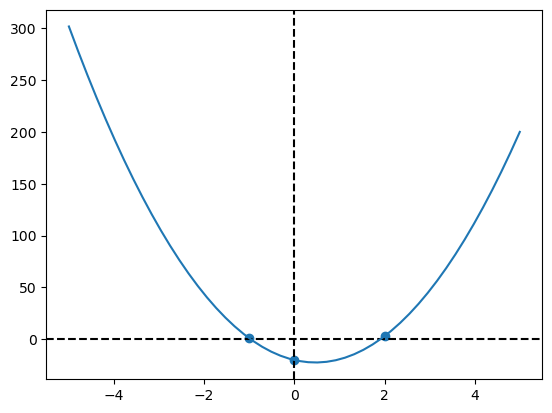

In [5]:
X = [-1, 0, 2]
Y = [1, -20, 3]
plt.axhline(y=0, color='black', linestyle='--')
plt.axvline(x=0, color='black', linestyle='--')
plt.plot(x, evaluateNewtonPoly(X,Y,x))
plt.scatter(X,Y)

## Interpolation Error 

We have our interpolation set $\{x_0, \dots, x_n\}$ corresponding to points $f(x_0), \dots, f(x_n)$. We only know the true value of $f(x)$ at the points $x_0, \dots, x_n$. Consider the interpolating polynomial $p_n(x)$ of of these points. We know that $p(x_i) = f(x_i)$ for all our interpolating points. A natural question is, if we evaluate our interpolating polynomial at some arbitrary $\bar x$, how far away will this be from our true value $f(\bar x)$? In other words, how can we quantify $E(\bar x) = f(\bar x) - p_n(\bar x)$. The idea is to add the point $\bar x$ to our interpolation. Suppose we are now interpolating over $\{x_0, \dots, x_n, \bar x\}$ to construct the new interpolating polynomial $p_{n+1}(x)$. Note that $p_{n+1}(\bar x) = f(\bar x)$. For intuition on why this is the case, see below. 

$$ p_{n+1}(x) = \sum_{k=0}^n f(x_k) l_k(x) + f(\bar x)l_{\bar x}(x) $$

Each term except for $f(\bar x)l_{\bar x}(x)$ contains a term of the form $\frac{x - \bar x}{x_k - \bar x}$, which evaluates to zero if we evaluate at $x = \bar x$. Thus, we can conclude:

$$p_{n+1}(\bar x) = f(\bar x) \implies E(\bar x) = f(\bar x) - p_n(\bar x) = p_{n+1}(\bar x) - p_n(\bar x)$$

Note that $p_{n+1}(x) = p_n(x) + f[x_0, \dots, \bar x](x - x_0)\dots(x - x_n)$. Thus, we can conclude: 

$$ E(\bar x) = p_{n+1}(\bar x) - p_n(\bar x) = p_n(\bar x) + f[x_0, \dots, \bar x](x - x_0)\dots(x - x_n) - p_n(\bar x) $$
$$ E(\bar x) = f[x_0, \dots, \bar x]\prod_{j=0}^n (\bar x - x_j)$$

We do not know the value of $f[x_0, \dots, \bar x]$ so we need to place a bound on it, which we can do by considering the properties of these divided differences. The divided differences are essentially a discrete form of the derivative. We will demonstrate that 

$$E(\bar x) = f[x_0, \dots, \bar x]\prod_{j=0}^n (\bar x - x_j) = \frac{f^{(n+1)}(c)}{(n+1)!}\prod_{j=0}^n (\bar x - x_j), c \in \{min(x_j), max(x_j)\}$$

This analysis tells us that if we have an estimate on the bound of $|\frac{f^{(n+1)}(c)}{(n+1)!}|$, we can estimate the size of our error. 

### Chebsheyev Sampling 

Note that our error is proportional to $\phi_n(\bar x) = \prod_{j=0}^n (\bar x - x_j)$. This nodal polynomial can have wildly different values based on the spacing of the nodes. For example, if the nodes are equally spaced, the function $\phi_n(\bar x)$ will oscilliate wildly and the interpolant will be unreliable. 

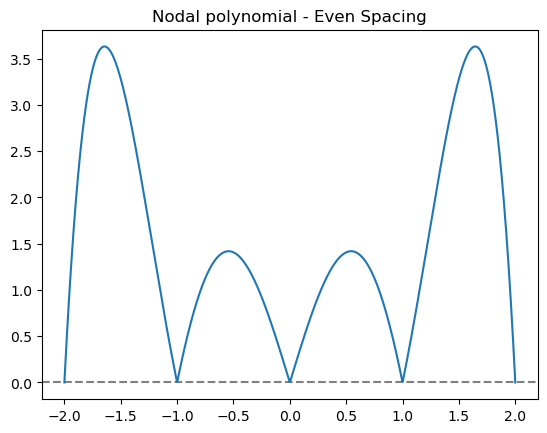

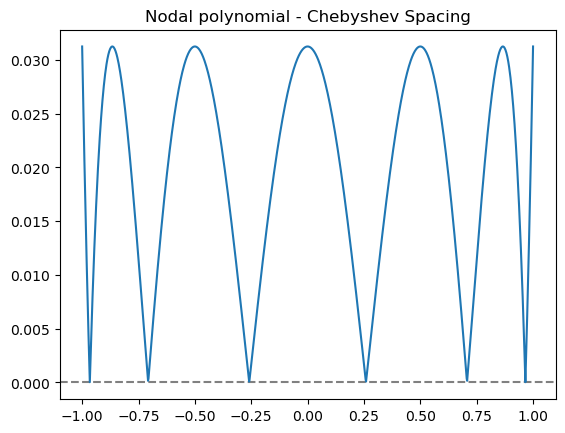

In [30]:
def evaluatePhi(x, points):
    prod = 1
    for point in points:
        prod *= (x - point)
    return abs(prod)

def generateChebyshevPoints(n):
    return [np.cos(np.pi * (2 * k + 1) / (2 * n + 2)) for k in range(n + 1)]

x = np.linspace(-2, 2, 1000)
points = [-2, -1, 0, 1, 2]
plt.axhline(0, color="gray", linestyle="--")
plt.plot(x, evaluatePhi(x, points), label="φ(x)")
plt.title("Nodal polynomial - Even Spacing")
plt.show()

x2 = np.linspace(-1, 1, 1000)
cheb = generateChebyshevPoints(5)
plt.axhline(0, color="gray", linestyle="--")
plt.plot(x2, evaluatePhi(x2, cheb), label="φ(x)")
plt.title("Nodal polynomial - Chebyshev Spacing")
plt.show()